In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df =  pd.read_csv('D:/3-1/BDE/lab/Pokemon.csv')

In [4]:
df.head(n=10)  

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [5]:
df.columns = df.columns.str.upper().str.replace('_', '') #change into upper case
df.head()

,ID,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df[df['LEGENDARY']==True].head(5)

,ID,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [7]:
df = df.set_index('NAME')

In [8]:
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head(10)

,ID,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [9]:
df=df.drop(['ID'],axis=1)

In [10]:
print('The columns of the dataset are: ',df.columns) 
print('The shape of the dataframe is: ',df.shape)

The columns of the dataset are:  Index(['TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK',
       'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')
The shape of the dataframe is:  (800, 11)


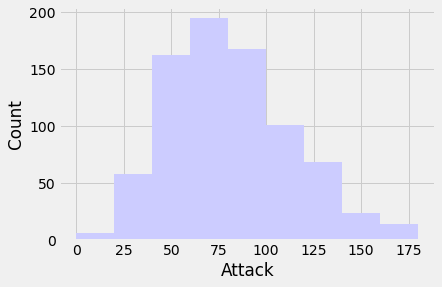

In [11]:
bins=range(0,200,20) 
plt.hist(df["ATTACK"],bins,histtype="bar",rwidth=1.2,color='#CCCCFF') 
plt.xlabel('Attack') 
plt.ylabel('Count') 
plt.plot()
 
plt.show()

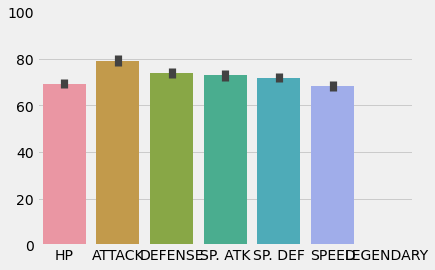

In [12]:
df2=df.drop(['GENERATION','TOTAL'],axis=1)
sns.barplot(data=df2)
plt.ylim(0,100)  
plt.show()

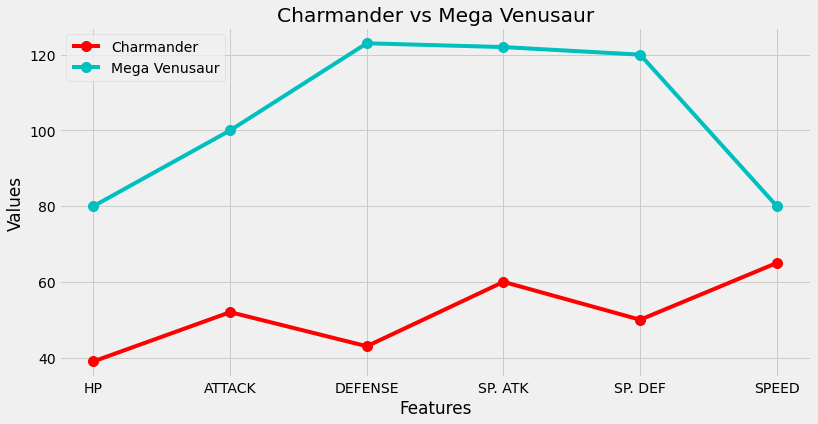

In [13]:
df_test = df.drop(["TYPE 1", "TYPE 2", "TOTAL", "GENERATION", "LEGENDARY"], axis=1)

def poke_compare(poke1, poke2):
    try:    
        df_test.loc[poke1].plot(color="r", marker="o", markersize=10 , label=poke1)
        df_test.loc[poke2].plot(color="c", marker="o", markersize=10, label=poke2)
        plt.xlabel("Features")
        plt.ylabel("Values")
        plt.title(poke1 + " vs " + poke2)
        fig = plt.gcf()
        fig.set_size_inches(12, 6)
        plt.legend()
        plt.show()
    except Exception:
        print("Please enter the correct names of the Pokemons")
    
poke_compare("Charmander", "Mega Venusaur")